In [2]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms.functional as F

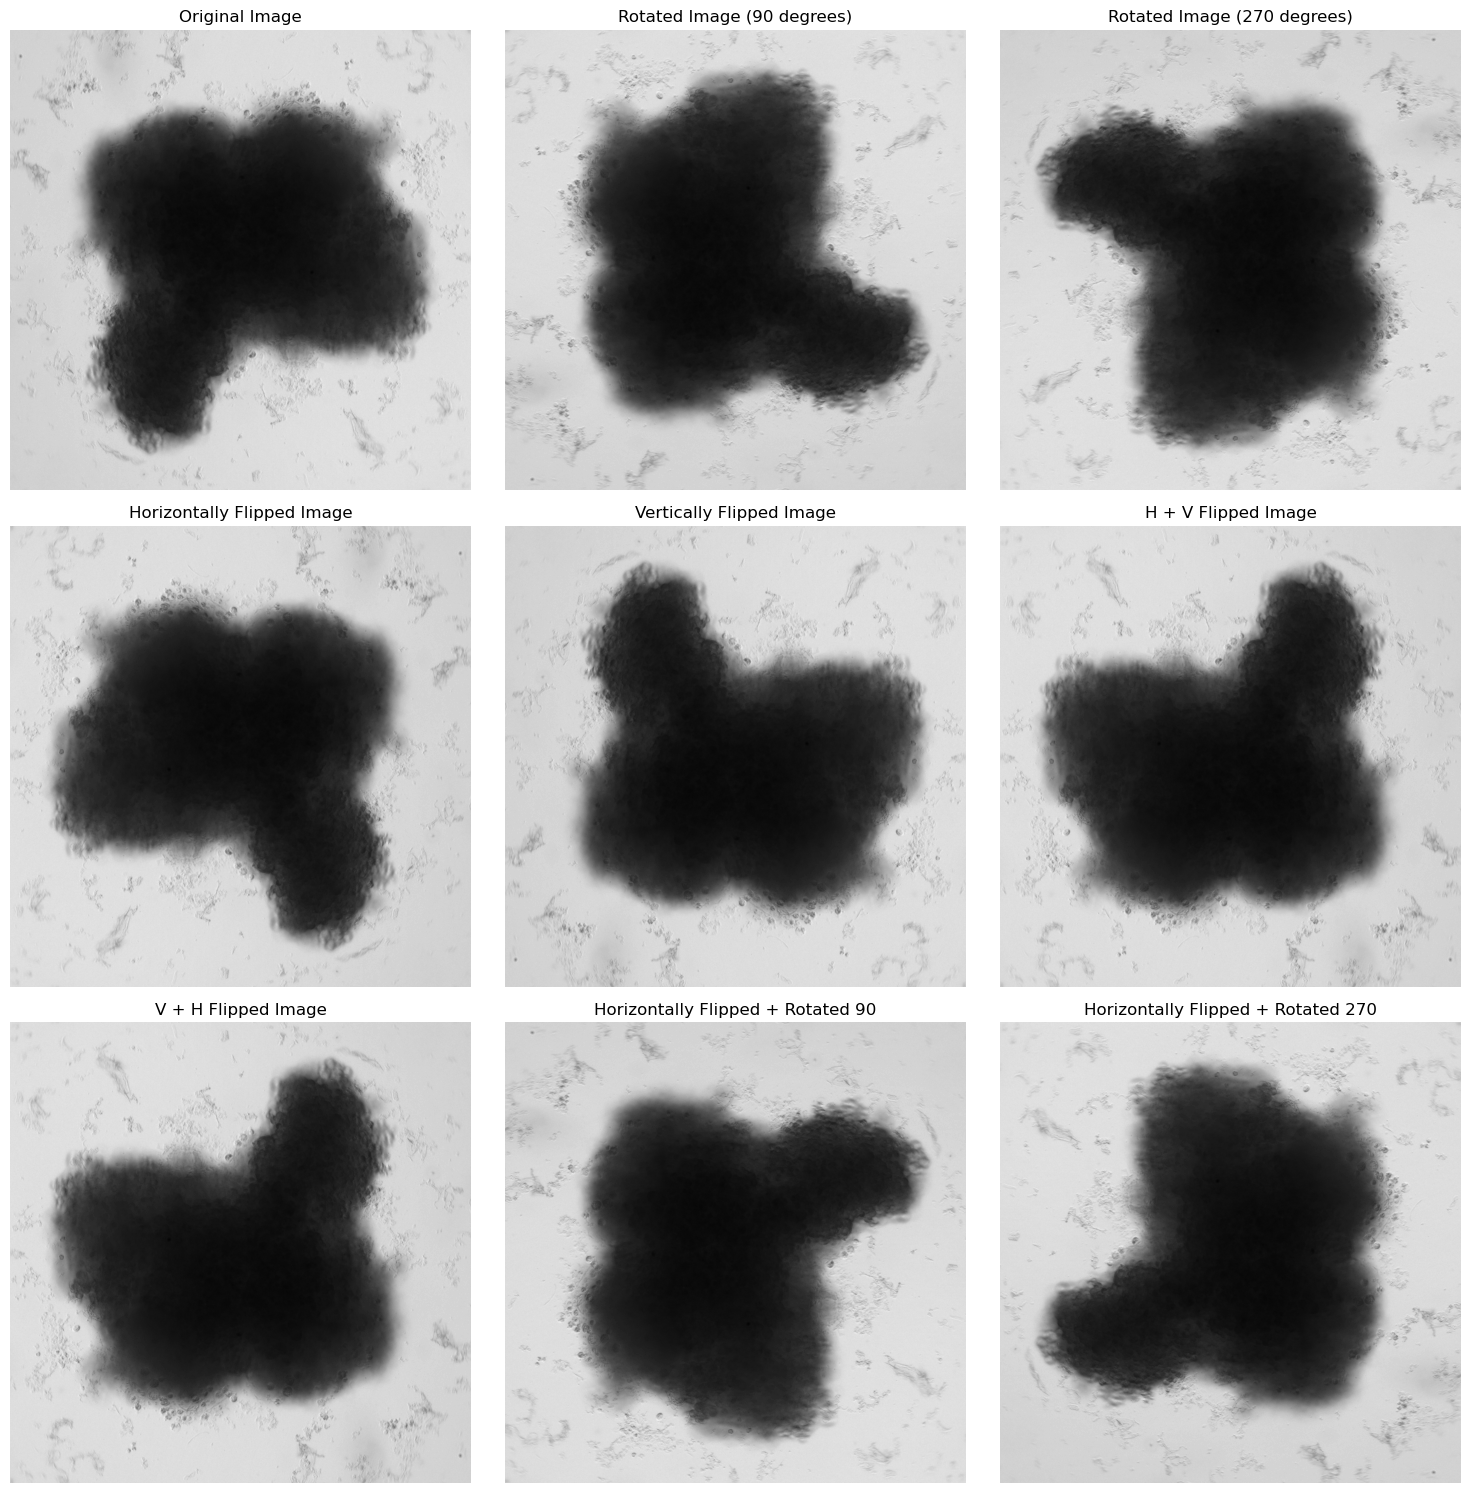

In [3]:
import tifffile as tiff# Path to the TIFF image
img_path = r'C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\sd_ds\single_dose\RBT 01.04_gant61\After Day10\GANT61\D10-T01.tiff'

# Load the image (16-bit grayscale)
img = tiff.imread(img_path).astype(np.float32) / 65535.0  # Normalize to [0, 1]

# Convert the image to a PyTorch tensor (expected shape: [C, H, W])
img_tensor = torch.tensor(img)

# Check if the image has multiple channels or needs unsqueezing
if img_tensor.ndim == 2:  # Single grayscale channel
    img_tensor = img_tensor.unsqueeze(0)  # Add channel dimension

# Define fixed rotation angles
fixed_angle = 90 * 1
angle_fixed = 90 * 3

# Apply transformations
rotated_img_tensor = F.rotate(img_tensor, angle=fixed_angle, fill=0)
rot_img_tensor = F.rotate(img_tensor, angle=angle_fixed, fill=0)
hflipped_img_tensor = F.hflip(img_tensor)
vflipped_img_tensor = F.vflip(img_tensor)
hv_flipped_img_tensor = F.vflip(F.hflip(img_tensor))
vh_flipped_img_tensor = F.hflip(F.vflip(img_tensor))

# Apply horizontal flip and then rotate 90 degrees
hf_rot_img_tensor = F.rotate(F.hflip(img_tensor), angle=90, fill=0)

# Apply horizontal flip and then rotate 270 degrees
hf_rot_270_img_tensor = F.rotate(F.hflip(img_tensor), angle=270, fill=0)

# Convert tensors to NumPy for visualization
rotated_img = rotated_img_tensor.numpy()
rot_img = rot_img_tensor.numpy()
hflipped_img = hflipped_img_tensor.numpy()
vflipped_img = vflipped_img_tensor.numpy()
hv_flipped_img = hv_flipped_img_tensor.numpy()
vh_flipped_img = vh_flipped_img_tensor.numpy()
hf_rot_img = hf_rot_img_tensor.numpy()
hf_rot_270_img = hf_rot_270_img_tensor.numpy()


# Display the images
plt.figure(figsize=(15, 20))

# Original Image
plt.subplot(4, 3, 1)
plt.title("Original Image")
plt.imshow(img_tensor[0].numpy(), cmap="gray")
plt.axis("off")

# Rotated Image (90 degrees)
plt.subplot(4, 3, 2)
plt.title(f"Rotated Image ({fixed_angle} degrees)")
plt.imshow(rotated_img[0], cmap="gray")
plt.axis("off")

# Rotated Image (270 degrees)
plt.subplot(4, 3, 3)
plt.title(f"Rotated Image ({angle_fixed} degrees)")
plt.imshow(rot_img[0], cmap="gray")
plt.axis("off")

# Horizontally Flipped Image
plt.subplot(4, 3, 4)
plt.title("Horizontally Flipped Image")
plt.imshow(hflipped_img[0], cmap="gray")
plt.axis("off")

# Vertically Flipped Image
plt.subplot(4, 3, 5)
plt.title("Vertically Flipped Image")
plt.imshow(vflipped_img[0], cmap="gray")
plt.axis("off")

# Horizontally and Vertically Flipped Image
plt.subplot(4, 3, 6)
plt.title("H + V Flipped Image")
plt.imshow(hv_flipped_img[0], cmap="gray")
plt.axis("off")

# Vertically and Horizontally Flipped Image
plt.subplot(4, 3, 7)
plt.title("V + H Flipped Image")
plt.imshow(vh_flipped_img[0], cmap="gray")
plt.axis("off")

# Horizontally Flip then Rotate 90 Degrees
plt.subplot(4, 3, 8)
plt.title("Horizontally Flipped + Rotated 90")
plt.imshow(hf_rot_img[0], cmap="gray")
plt.axis("off")

# Horizontally Flip then Rotate 270 Degrees
plt.subplot(4, 3, 9)
plt.title("Horizontally Flipped + Rotated 270")
plt.imshow(hf_rot_270_img[0], cmap="gray")
plt.axis("off")


plt.tight_layout()
plt.show()